In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
hdb = pd.read_csv('HDB_Complete_dataset.csv')

In [18]:
dataset_features = hdb[['resale_price', 'town_cat','storey_range','flat_type' ,'floor_area_sqm', 'Planning Area','total_dwelling_units', 'remaining_lease_yrs', 
                    'distance_secondary_school','distance_primary_school', 'distance_mrt', 'distance_supermarket', 'distance_hawker',
                    'distance_city', 'distance_npc', 'distance_cc','commercial','Mature_Estate']]
print(len(dataset_features))
# Only "y varable" 
resale_p = dataset_features['resale_price']

# All other indepdendent variables
X = dataset_features[['flat_type' , 'town_cat','storey_range','floor_area_sqm', 'Planning Area','total_dwelling_units', 'remaining_lease_yrs', 
                    'distance_secondary_school','distance_primary_school', 'distance_mrt', 'distance_supermarket', 'distance_hawker',
                    'distance_city', 'distance_npc', 'distance_cc','commercial','Mature_Estate']]
dataset_features.head()

111824


resale_price  town_cat  storey_range  flat_type  floor_area_sqm  \
0      232000.0       0.0          11.0        2.0            44.0   
1      235000.0       0.0          11.0        2.0            44.0   
2      202000.0       0.0           2.0        2.0            44.0   
3      210000.0       0.0           2.0        2.0            44.0   
4      220000.0       0.0           6.0        2.0            44.0   

   Planning Area  total_dwelling_units  remaining_lease_yrs  \
0            2.0                   220            61.679452   
1            2.0                   220            61.084932   
2            2.0                   220            60.339726   
3            2.0                   220            60.339726   
4            2.0                   220            60.084932   

   distance_secondary_school  distance_primary_school  distance_mrt  \
0                   0.576105                 0.089405      1.000219   
1                   0.576105                 0.089405      1.000219   
2                   0.576105                 0.089405      1.000219   
3                   0.576105                 0.089405      1.000219   
4                   0.576105                 0.089405      1.000219   

   distance_supermarket  distance_hawker  distance_city  distance_npc  \
0              0.748675         0.172411       7.612266      0.828923   
1              0.748675         0.172411       7.612266      0.828923   
2              0.748675         0.172411       7.612266      0.828923   
3              0.748675         0.172411       7.612266      0.828923   
4              0.748675         0.172411       7.612266      0.828923   

   distance_cc  commercial  Mature_Estate  
0      0.27193           0            1.0  
1      0.27193           0            1.0  
2      0.27193           0            1.0  
3      0.27193           0            1.0  
4      0.27193           0            1.0

<AxesSubplot:>

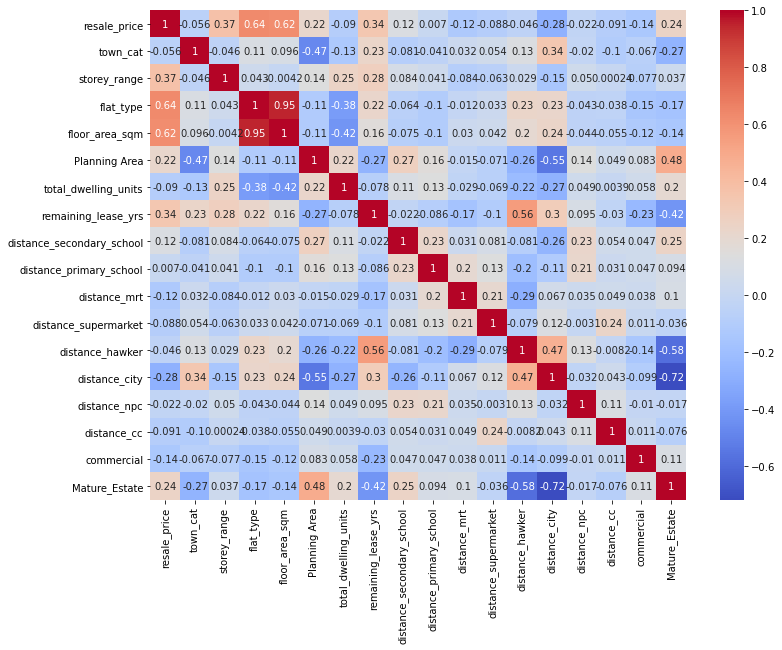

In [30]:
#Have correlation analysis for resale price with all variables:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


corrMatrix = dataset_features.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrMatrix, xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns, cmap='coolwarm', annot=True)

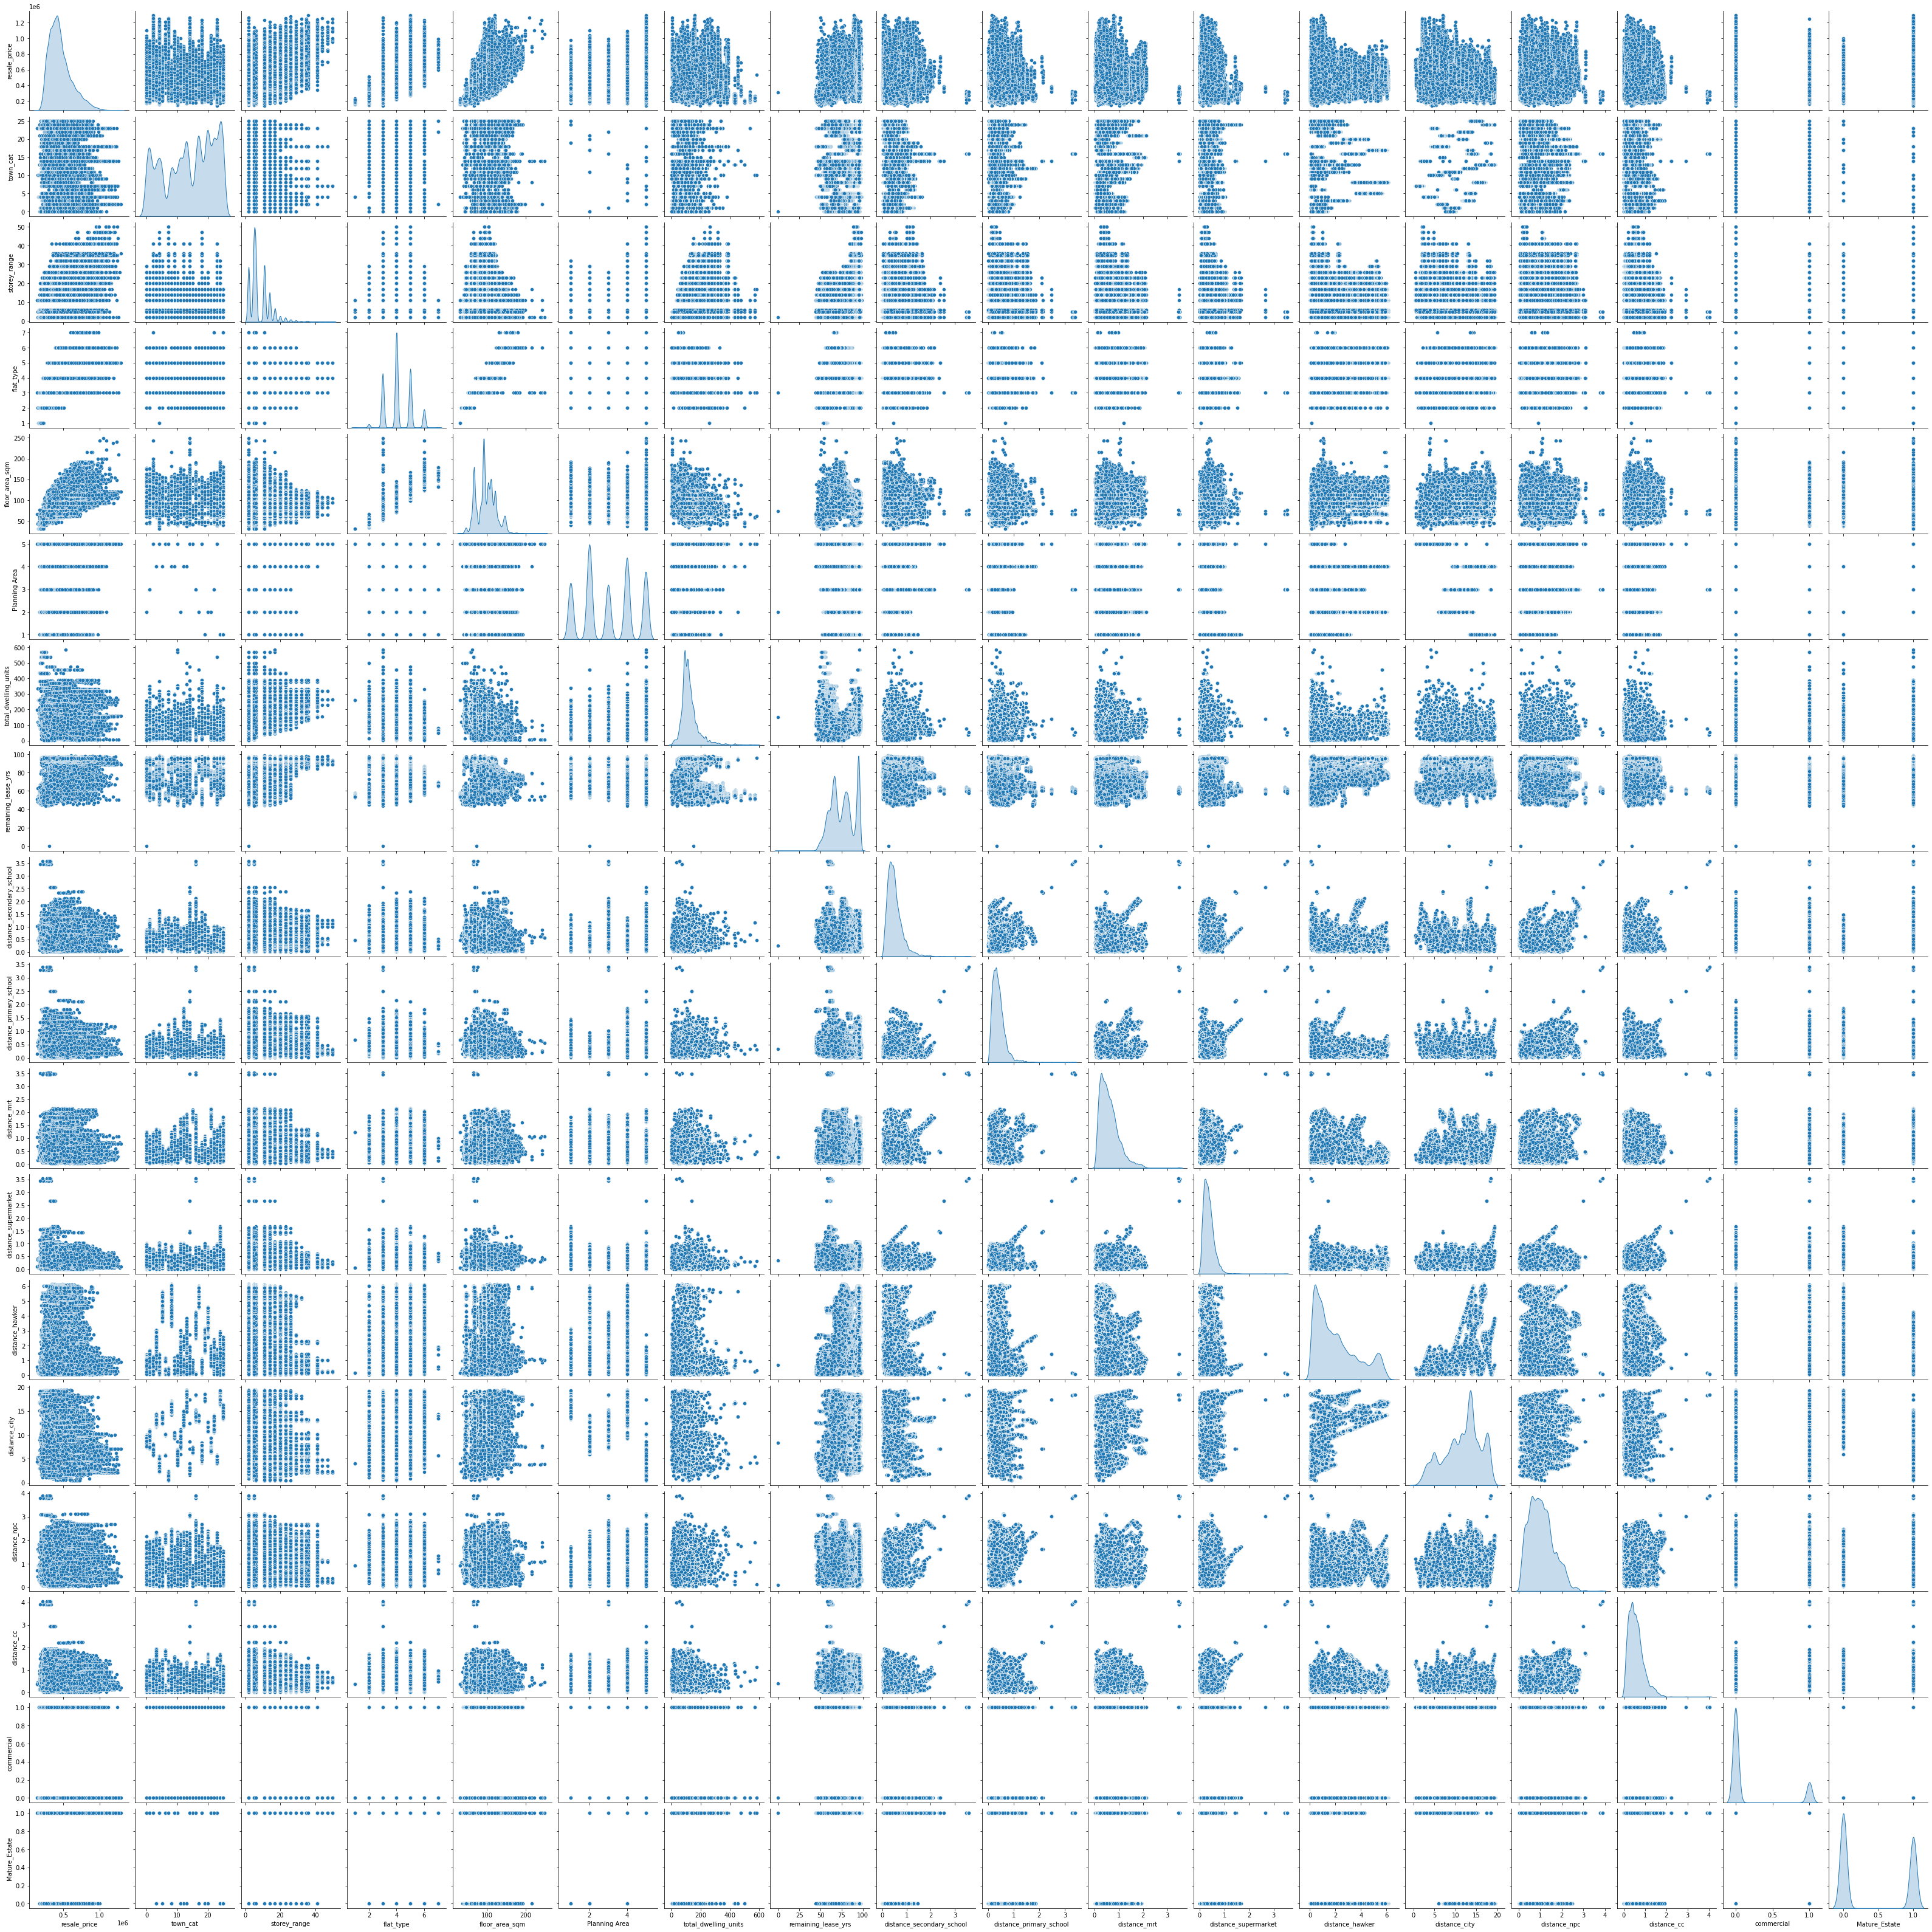

In [63]:
import seaborn as sns
sns.pairplot(dataset_features,diag_kind='kde')

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler


models_name=['LinearRegression','GBRT','RandomForest']
models=[]

models.append(LinearRegression())
models.append(ensemble.GradientBoostingRegressor(n_estimators=100))
models.append(ensemble.RandomForestRegressor(n_estimators=200))

In [20]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, resale_p, test_size=.3, random_state=0)
MSE_lst = []

for i in models:
    i.fit(X_train, y_train) # Train the model using the training sets
    y_pred = i.predict(X_test) # Make predictions using the testing set
    MSE = mean_squared_error(y_test, y_pred) # performance statistic
    MSE_lst.append(MSE)

np.random.seed(100)
regre = LinearRegression()
regre.fit(X_train, y_train) # Train the model using the training sets
y_pred_ols = regre.predict(X_test) # Make predictions using the testing set
MSE_ols = mean_squared_error(y_test, y_pred_ols) # performance statistic
MSE_lst.append(MSE_ols)
score_regre = regre.score(X_test,y_test)
print('OLS_MSE =', MSE_ols)
print('OLS_R squared =', score_regre)

from sklearn.ensemble import GradientBoostingRegressor
GradientBoostingRegressor = GradientBoostingRegressor()
GradientBoostingRegressor.fit(X=X_train, y=y_train)
y_pred_GradientBoostingRegressor = GradientBoostingRegressor.predict(X=X_test)
MSE_GradientBoostingRegressor = mean_squared_error(y_test, y_pred_GradientBoostingRegressor)
MSE_lst.append(MSE_GradientBoostingRegressor)
score_GBR = GradientBoostingRegressor.score(X_test,y_test)
print('GBR_MSE =', MSE_GradientBoostingRegressor)
print('GBR_R squared =', score_GBR)

from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor.fit(X=X_train, y=y_train)
y_pred_RandomForestRegressor = RandomForestRegressor.predict(X=X_test)
MSE_RandomForestRegressor = mean_squared_error(y_test, y_pred_RandomForestRegressor)
MSE_lst.append(MSE_RandomForestRegressor)
score_RFR = RandomForestRegressor.score(X_test,y_test)
print('RFR_MSE =',MSE_RandomForestRegressor)
print('RFR_R squared =', score_RFR)


OLS_MSE = 4387516252.337464
OLS_R squared = 0.8252954926006144
GBR_MSE = 2378680647.040532
GBR_R squared = 0.9052844008315015
RFR_MSE = 896194756.3756748
RFR_R squared = 0.9643148299762737


In [116]:
OLS_df = pd.DataFrame(data= { 'resale_price': y_test,'predicted_price': y_pred_ols})
OLS_df.head()

resale_price  predicted_price
32738      390000.0    451258.310654
73042      491000.0    595666.431557
82527      250000.0    299178.037057
6719       300000.0    258900.057618
52230      255000.0    239525.766321

In [35]:
OLS_df.to_csv('OLS_HDB.csv',index=False)

In [117]:
#Summary of OLS model
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 2.181e+04
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:55:50   Log-Likelihood:            -9.7962e+05
No. Observations:               78276   AIC:                         1.959e+06
Df Residuals:                   78258   BIC:                         1.959e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

MSE Train: 4343664017.745, Test: 4387516252.337
R2_Score Train: 0.826, Test: 0.825


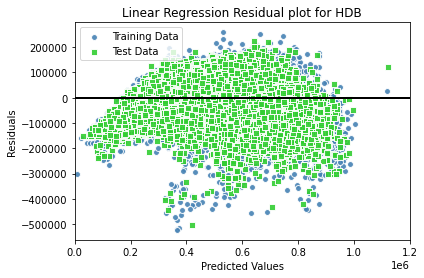

In [169]:
#Residual for Linear regression model
regre.fit(X_train,y_train)
y_train_pred=regre.predict(X_train)
y_test_pred=regre.predict(X_test)

#Evaluate model performance via MSE and R2_Score
from sklearn.metrics import mean_squared_error,r2_score

print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(y_train,y_train_pred),
                                       mean_squared_error(y_test,y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(y_train,y_train_pred),
                                            r2_score(y_test,y_test_pred)))
#Visualize the residuals of the prediction
plt.scatter(y_train_pred,y_train_pred-y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=30,
            alpha=0.9,
            label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linear Regression Residual plot for HDB")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=1200000,lw=2,color='black')
plt.xlim([0,1200000])
plt.show()

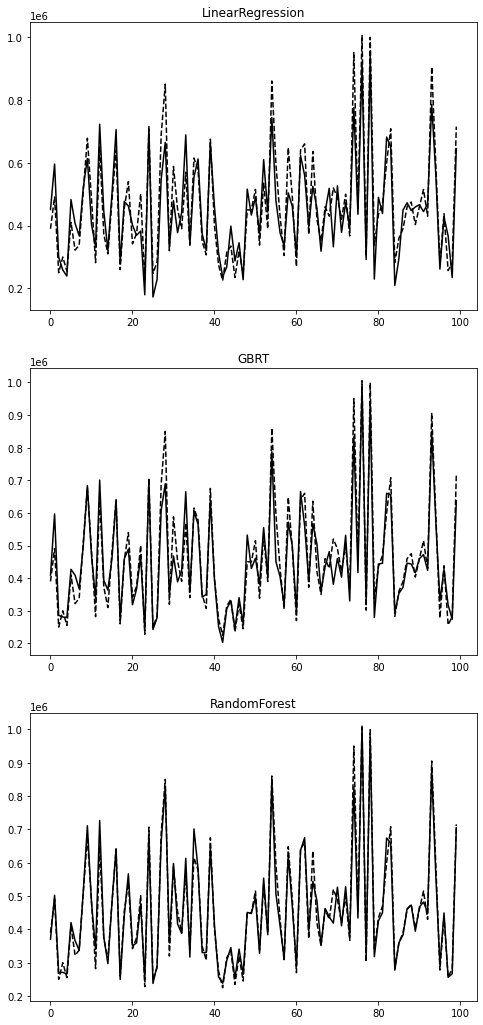

In [6]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,18))
for i in range(len(models)):
    plt.subplot(311+i)
    ax=plt.gca()
    y_pred=models[i].predict(X_test)
    ax.plot(range(len(y_test[:100])), y_test[:100],'k--',label='Actual')
    ax.plot(range(len(y_pred[:100])), y_pred[:100], 'k',label='Predicted')
    plt.title('%s'%models_name[i])


MSE Train: 127027355.059, Test: 895278715.106
R2_Score Train: 0.995, Test: 0.964


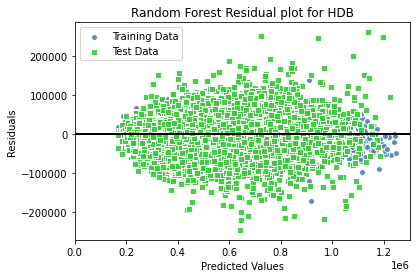

In [170]:
#Residual for Random Forest before parameter adjustment
RandomForestRegressor.fit(X_train,y_train)
y_train_pred=RandomForestRegressor.predict(X_train)
y_test_pred=RandomForestRegressor.predict(X_test)

#Evaluate model performance via MSE and R2_Score
from sklearn.metrics import mean_squared_error,r2_score

print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(y_train,y_train_pred),
                                       mean_squared_error(y_test,y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(y_train,y_train_pred),
                                            r2_score(y_test,y_test_pred)))
#Visualize the residuals of the prediction
plt.scatter(y_train_pred,y_train_pred-y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=30,
            alpha=0.9,
            label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Random Forest Residual plot for HDB")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=1300000,lw=2,color='black')
plt.xlim([0,1300000])
plt.show()

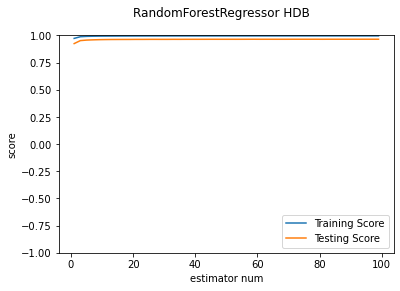

In [21]:
def test_RandomForestRegressor_num(*data):

    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,100,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        regr=ensemble.RandomForestRegressor(n_estimators=num)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1)
    plt.suptitle("RandomForestRegressor HDB")
    plt.show()
    
# test_RandomForestRegressor_num
test_RandomForestRegressor_num(X_train,X_test,y_train,y_test) 

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train.astype('int'))
X_test_norm = mms.transform(X_test)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train.astype('int'))
X_test_std = stdsc.transform(X_test)


feat_labels = dataset_features.columns[1:]

forest = RandomForestClassifier(n_estimators=25,
                                random_state=1)

forest.fit(X_train, y_train.astype('int'))
importances = forest.feature_importances_
print(importances)

[0.0050999  0.00920884 0.15994133 0.06662063 0.00401092 0.03840674
 0.32587532 0.04762611 0.04767981 0.04862806 0.04718655 0.0471266
 0.04834136 0.04799394 0.04769697 0.00741127 0.00114564]


 1) remaining_lease_yrs                                          0.325875
 2) flat_type                                                    0.159941
 3) floor_area_sqm                                               0.066621
 4) distance_mrt                                                 0.048628
 5) distance_city                                                0.048341
 6) distance_npc                                                 0.047994
 7) distance_cc                                                  0.047697
 8) distance_primary_school                                      0.047680
 9) distance_secondary_school                                    0.047626
10) distance_supermarket                                         0.047187
11) distance_hawker                                              0.047127
12) total_dwelling_units                                         0.038407
13) storey_range                                                 0.009209
14) commercial                        

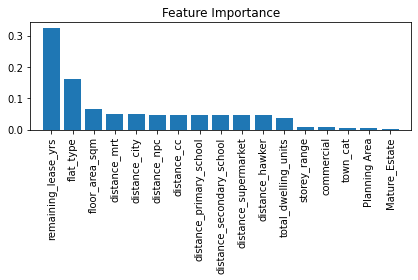

In [8]:
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 60,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [9]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)  
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:',
      X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

Number of features that meet this threshold criterion: 2
 1) remaining_lease_yrs            0.325875
 2) flat_type                      0.159941


In [8]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

max_features = [.1,.3,.5,.7,.9,.99]#trying a series of parameters
test_scores = []

for max_feat in tqdm(max_features):
    clf = RandomForestRegressor(n_estimators = 200,max_features = max_feat)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv = 5,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))


100%|██████████| 6/6 [25:37<00:00, 256.21s/it]


Text(0.5, 1.0, 'Max Features vs CV Error')

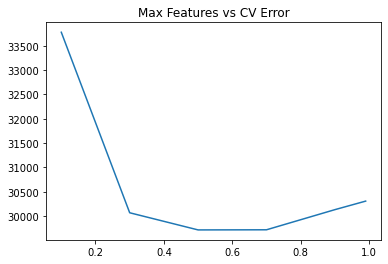

In [9]:
#result
import matplotlib.pyplot as plt
plt.plot(max_features,test_scores)
plt.title('Max Features vs CV Error')

#The possible optimal parameter may be 0.7

In [130]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators = 200,max_features =0.7)
rfg.fit(X_train, y_train)
y_rfg = rfg.predict(X_test)
submission_df = pd.DataFrame(data= { 'y_test': y_test,'predicted_price': y_rfg})


In [90]:
print(rfg.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 0.7, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [91]:
submission_df.head()

y_test  predicted_price
32738  390000.0        370352.76
73042  491000.0        503145.00
82527  250000.0        268428.32
6719   300000.0        273718.52
52230  255000.0        265770.00

In [131]:
from numpy import mean
average1 = mean(y_test)
average2 = mean(y_rfg)
max1 = np.max(y_test)
max2 = np.max(y_rfg)
print('Average y_test =', average1)
print('Average predicted_price =', average2)
print('Maximum y_test =', max1)
print('Maximum y_rfg =', max2)

Average y_test = 456943.7768200787
Average predicted_price = 456295.259636511
Maximum y_test = 1240000.0
Maximum y_rfg = 1214205.88


In [12]:
submission_df.to_csv('rfg_HDB.csv',index=False)

# Private Housing

In [2]:
ph = pd.read_csv('Private_Housing_Complete_dataset.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataset_features = ph[['abs_price', 'Postal District','Type_no','Floor_no' ,'floor_area_sqm', 'Planning Area_no', 'remaining_lease_yrs', 
                    'distance_secondary_school','distance_primary_school', 'distance_mrt', 'distance_supermarket', 'distance_hawker',
                    'distance_city', 'distance_npc', 'distance_cc','Mature_Estate']]
print(len(dataset_features))
# Only "y varable" 
resale_p = dataset_features['abs_price']

# All other indepdendent variables
X = dataset_features[['Postal District','Type_no','Floor_no' ,'floor_area_sqm', 'Planning Area_no', 'remaining_lease_yrs', 
                    'distance_secondary_school','distance_primary_school', 'distance_mrt', 'distance_supermarket', 'distance_hawker',
                    'distance_city', 'distance_npc', 'distance_cc','Mature_Estate']]
dataset_features.head()

49613


abs_price  Postal District  Type_no  Floor_no  floor_area_sqm  \
0  3290240.0                1        1        48          1356.0   
1  2487680.0                1        1        43          1216.0   
2  2130000.0                1        1        53           883.0   
3  2990000.0                1        1        38          1356.0   
4  3150000.0                1        1        38          1518.0   

   Planning Area_no  remaining_lease_yrs  distance_secondary_school  \
0                 5                   89                   1.634421   
1                 5                   89                   1.634421   
2                 5                   89                   1.634421   
3                 5                   89                   1.634421   
4                 5                   89                   1.634421   

   distance_primary_school  distance_mrt  distance_supermarket  \
0                 1.012462      0.374709              0.601335   
1                 1.012462      0.374709              0.601335   
2                 1.012462      0.374709              0.601335   
3                 1.012462      0.374709              0.601335   
4                 1.012462      0.374709              0.601335   

   distance_hawker  distance_city  distance_npc  distance_cc  Mature_Estate  
0         0.376115       1.817501      0.260453     0.823495              1  
1         0.376115       1.817501      0.260453     0.823495              1  
2         0.376115       1.817501      0.260453     0.823495              1  
3         0.376115       1.817501      0.260453     0.823495              1  
4         0.376115       1.817501      0.260453     0.823495              1

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


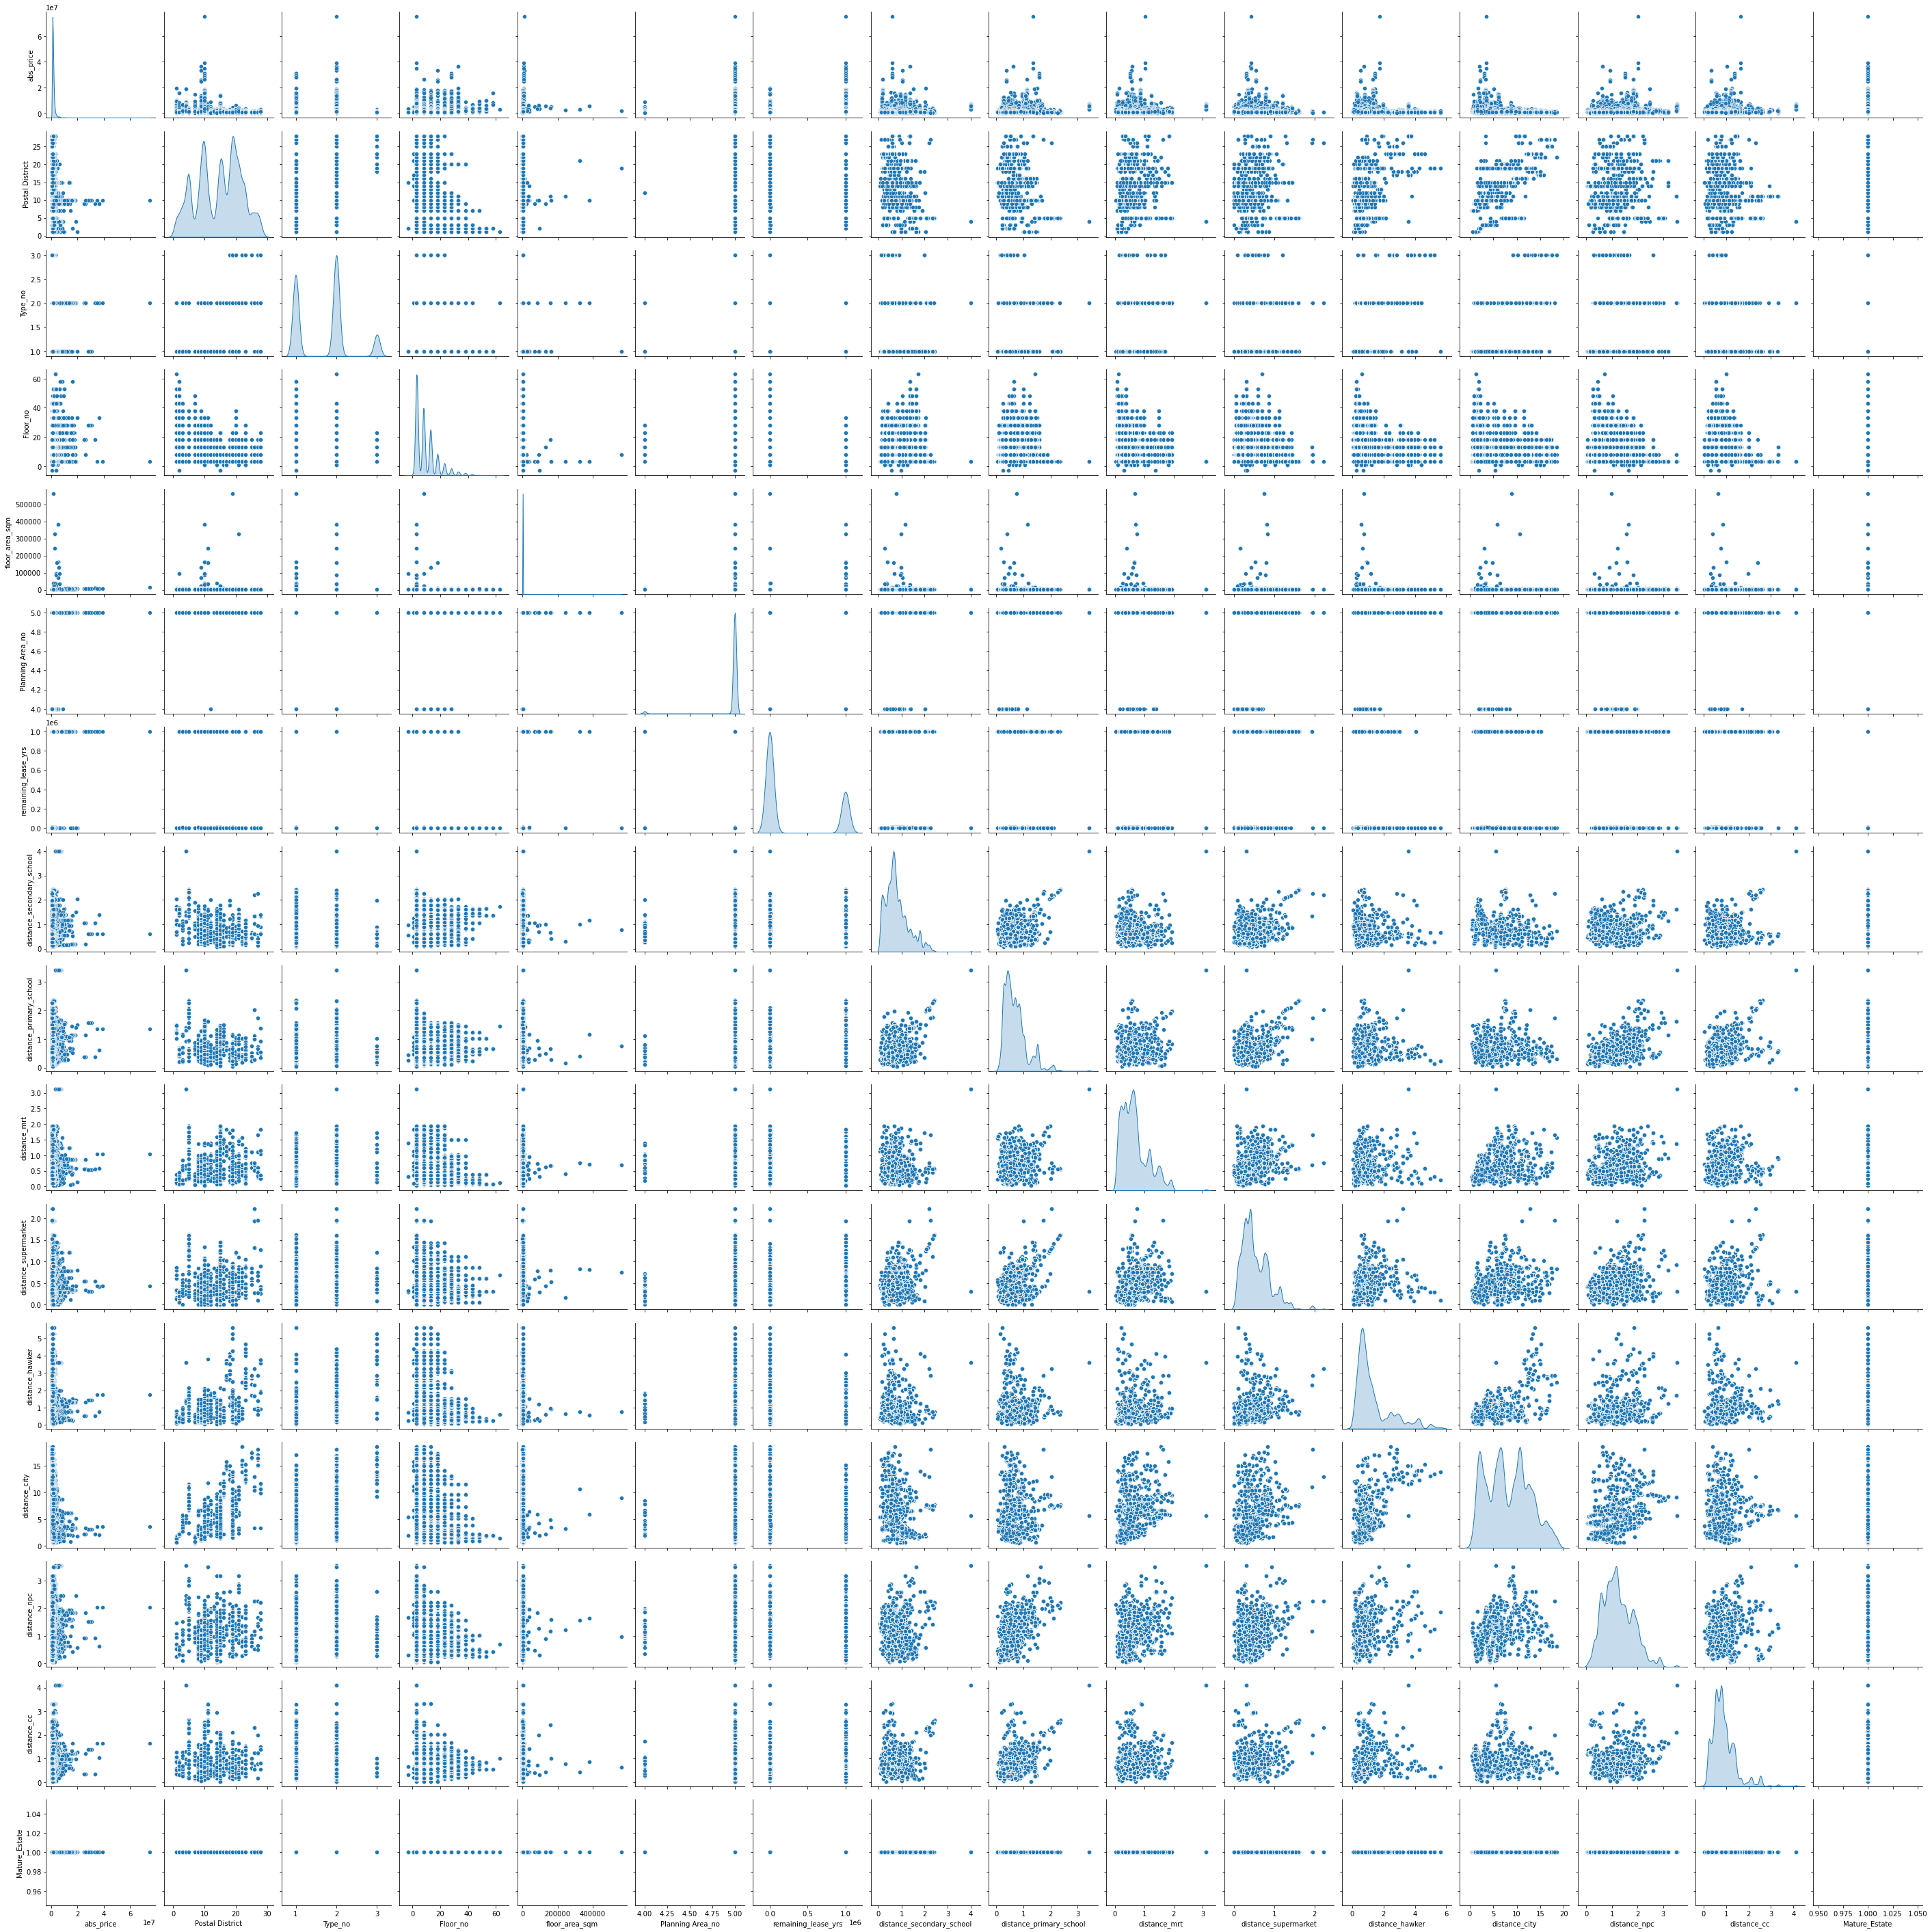

In [4]:
import seaborn as sns
sns.pairplot(dataset_features,diag_kind='kde')

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler


models_name=['LinearRegression','GBRT','RandomForest']
models=[]

models.append(LinearRegression())
models.append(ensemble.GradientBoostingRegressor(n_estimators=100))
models.append(ensemble.RandomForestRegressor(n_estimators=40))

In [5]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, resale_p, test_size=.3, random_state=0)
MSE_lst = []

for i in models:
    i.fit(X_train, y_train) # Train the model using the training sets
    y_pred = i.predict(X_test) # Make predictions using the testing set
    MSE = mean_squared_error(y_test, y_pred) # performance statistic
    MSE_lst.append(MSE)

np.random.seed(100)
regre = LinearRegression()
regre.fit(X_train, y_train) # Train the model using the training sets
y_pred_ols = regre.predict(X_test) # Make predictions using the testing set
MSE_ols = mean_squared_error(y_test, y_pred_ols) # performance statistic
MSE_lst.append(MSE_ols)
score_regre = regre.score(X_test,y_test)
print('OLS_MSE =', MSE_ols)
print('OLS_R squared =', score_regre)

from sklearn.ensemble import GradientBoostingRegressor
GradientBoostingRegressor = GradientBoostingRegressor()
GradientBoostingRegressor.fit(X=X_train, y=y_train)
y_pred_GradientBoostingRegressor = GradientBoostingRegressor.predict(X=X_test)
MSE_GradientBoostingRegressor = mean_squared_error(y_test, y_pred_GradientBoostingRegressor)
MSE_lst.append(MSE_GradientBoostingRegressor)
score_GBR = GradientBoostingRegressor.score(X_test,y_test)
print('GBR_MSE =', MSE_GradientBoostingRegressor)
print('GBR_R squared =', score_GBR)

from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor.fit(X=X_train, y=y_train)
y_pred_RandomForestRegressor = RandomForestRegressor.predict(X=X_test)
MSE_RandomForestRegressor = mean_squared_error(y_test, y_pred_RandomForestRegressor)
MSE_lst.append(MSE_RandomForestRegressor)
score_RFR = RandomForestRegressor.score(X_test,y_test)
print('RFR_MSE =',MSE_RandomForestRegressor)
print('RFR_R squared =', score_RFR)


OLS_MSE = 1443949572569.5076
OLS_R squared = 0.2443561925130916
GBR_MSE = 149540294048.7973
GBR_R squared = 0.921742975437388
RFR_MSE = 47068756485.42806
RFR_R squared = 0.9753681049255541


In [7]:
#RandomForest has better accuracy

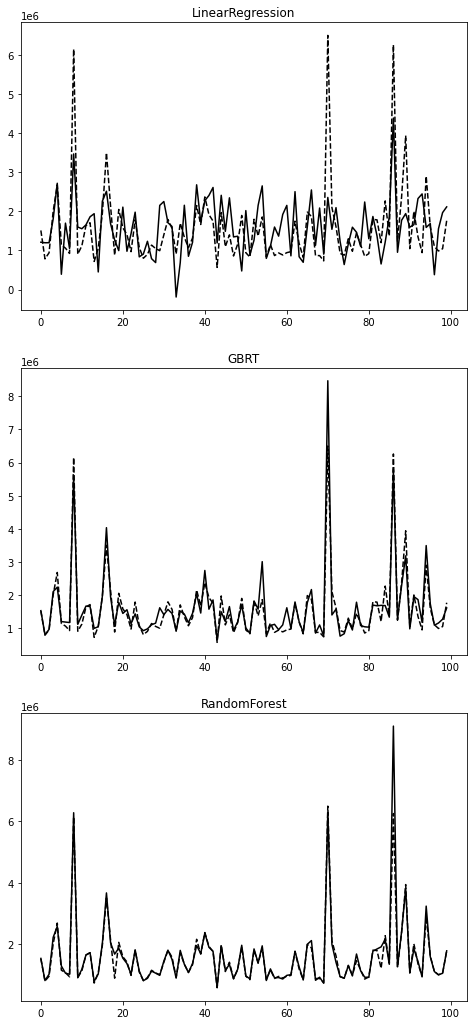

In [8]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,18))
for i in range(len(models)):
    plt.subplot(311+i)
    ax=plt.gca()
    y_pred=models[i].predict(X_test)
    ax.plot(range(len(y_test[:100])), y_test[:100],'k--',label='Actual')
    ax.plot(range(len(y_pred[:100])), y_pred[:100], 'k',label='Predicted')
    plt.title('%s'%models_name[i])


MSE Train: 29812585919.726, Test: 48036221156.803
R2_Score Train: 0.987, Test: 0.975


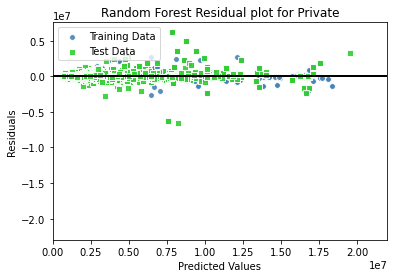

In [9]:
RandomForestRegressor.fit(X_train,y_train)
y_train_pred=RandomForestRegressor.predict(X_train)
y_test_pred=RandomForestRegressor.predict(X_test)

#Evaluate model performance via MSE and R2_Score
from sklearn.metrics import mean_squared_error,r2_score

print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(y_train,y_train_pred),
                                       mean_squared_error(y_test,y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(y_train,y_train_pred),
                                            r2_score(y_test,y_test_pred)))
#Visualize the residuals of the prediction
plt.scatter(y_train_pred,y_train_pred-y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=30,
            alpha=0.9,
            label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Random Forest Residual plot for Private")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=22000000,lw=2,color='black')
plt.xlim([0,22000000])
plt.show()

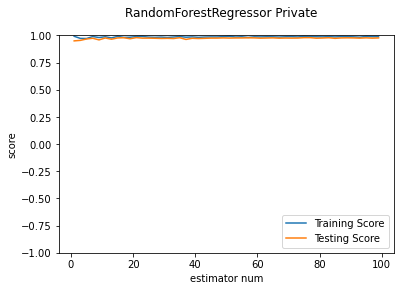

In [10]:
def test_RandomForestRegressor_num(*data):

    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,100,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        regr=ensemble.RandomForestRegressor(n_estimators=num)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1)
    plt.suptitle("RandomForestRegressor Private")
    plt.show()
    
# test_RandomForestRegressor_num
test_RandomForestRegressor_num(X_train,X_test,y_train,y_test) 

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train.astype('int'))
X_test_norm = mms.transform(X_test)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train.astype('int'))
X_test_std = stdsc.transform(X_test)


feat_labels = dataset_features.columns[1:]

forest = RandomForestClassifier(n_estimators=60,
                                random_state=1)

forest.fit(X_train, y_train.astype('int'))
importances = forest.feature_importances_
print(importances)

[0.01329411 0.00538083 0.25328321 0.53405793 0.00102718 0.01261719
 0.02238435 0.02204848 0.022027   0.02245727 0.0221031  0.023237
 0.02328034 0.02280201 0.        ]


 1) floor_area_sqm                                               0.534058
 2) Floor_no                                                     0.253283
 3) distance_npc                                                 0.023280
 4) distance_city                                                0.023237
 5) distance_cc                                                  0.022802
 6) distance_supermarket                                         0.022457
 7) distance_secondary_school                                    0.022384
 8) distance_hawker                                              0.022103
 9) distance_primary_school                                      0.022048
10) distance_mrt                                                 0.022027
11) Postal District                                              0.013294
12) remaining_lease_yrs                                          0.012617
13) Type_no                                                      0.005381
14) Planning Area_no                  

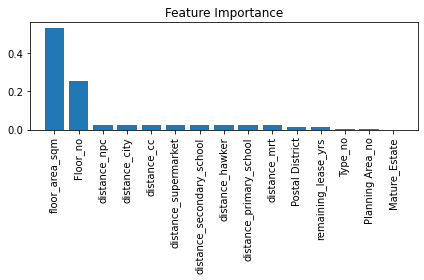

In [7]:
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 60,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [8]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)  
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:',
      X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

Number of features that meet this threshold criterion: 2
 1) floor_area_sqm                 0.534058
 2) Floor_no                       0.253283


100%|██████████| 8/8 [04:17<00:00, 32.23s/it]


Text(0.5, 1.0, 'Max Features vs CV Error')

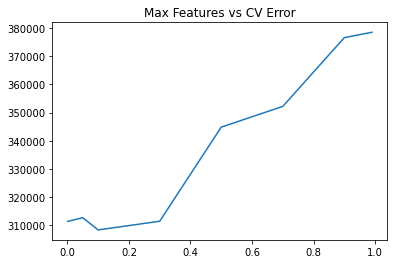

In [22]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

max_features = [.001,.05,.1,.3,.5,.7,.9,.99]#trying a series of parameters
test_scores = []

for max_feat in tqdm(max_features):
    clf = RandomForestRegressor(n_estimators = 200,max_features = max_feat)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv = 5,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))


#result
import matplotlib.pyplot as plt
plt.plot(max_features,test_scores)
plt.title('Max Features vs CV Error')

In [23]:
##The possible optimal parameter may be 0.1

In [6]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators = 200,max_features =0.1)
rfg.fit(X_train, y_train)
y_rfg = rfg.predict(X_test)
submission_df = pd.DataFrame(data= { 'y_test': y_test,'predicted_price': y_rfg})

In [97]:
print(rfg.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 0.1, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [98]:
submission_df.head()

y_test  predicted_price
39910  1513000.0     1.522919e+06
26685   786000.0     8.020888e+05
25718   942000.0     1.007335e+06
37916  2000000.0     2.218186e+06
24821  2680000.0     2.484494e+06

In [7]:
from numpy import mean
average1 = mean(y_test)
average2 = mean(y_rfg)
max1 = np.max(y_test)
max2 = np.max(y_rfg)
print('Average y_test =', average1)
print('Average predicted_price =', average2)
print('Maximum y_test =', max1)
print('Maximum y_rfg =', max2)

Average y_test = 1672409.735421423
Average predicted_price = 1670308.988822118
Maximum y_test = 39000000.0
Maximum y_rfg = 37124959.78906061


In [26]:
submission_df.to_csv('rfg_private.csv',index=False)

# Landed Housing

In [8]:
lh = pd.read_csv('Landed_Complete_dataset.csv')

In [9]:
dataset_features = lh[['abs_price', 'Postal District','Type_no' ,'floor_area_sqm', 'Planning Area_no', 'remaining_lease_yrs', 
                    'distance_secondary_school','distance_primary_school', 'distance_mrt', 'distance_supermarket', 'distance_hawker',
                    'distance_city', 'distance_npc', 'distance_cc','Mature_Estate']]
print(len(dataset_features))
# Only "y varable" 
resale_p = dataset_features['abs_price']

# All other indepdendent variables
X = dataset_features[['Postal District','Type_no' ,'floor_area_sqm', 'Planning Area_no', 'remaining_lease_yrs', 
                    'distance_secondary_school','distance_primary_school', 'distance_mrt', 'distance_supermarket', 'distance_hawker',
                    'distance_city', 'distance_npc', 'distance_cc','Mature_Estate']]
dataset_features.head()

12438


abs_price  Postal District  Type_no  floor_area_sqm  Planning Area_no  \
0  6000000.0                2        3          3193.0                 5   
1  6000000.0                2        3          3193.0                 5   
2  6380000.0                3        1          5199.0                 5   
3  6380000.0                3        1          5199.0                 5   
4  5550000.0                3        1          4674.0                 5   

   remaining_lease_yrs  distance_secondary_school  distance_primary_school  \
0               999999                   0.960972                 0.684728   
1               999999                   0.960972                 0.684728   
2               999999                   0.901405                 0.776450   
3               999999                   0.901405                 0.776450   
4               999999                   0.733715                 0.579922   

   distance_mrt  distance_supermarket  distance_hawker  distance_city  \
0      0.463179              0.444501         0.104015       1.732091   
1      0.463179              0.444501         0.104015       1.732091   
2      0.509438              0.203843         0.451131       5.202830   
3      0.509438              0.203843         0.451131       5.202830   
4      0.360550              0.412032         0.557248       5.071424   

   distance_npc  distance_cc  Mature_Estate  
0      0.525199     0.145201              1  
1      0.525199     0.145201              1  
2      0.391794     0.984172              1  
3      0.391794     0.984172              1  
4      0.591292     0.892015              1

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


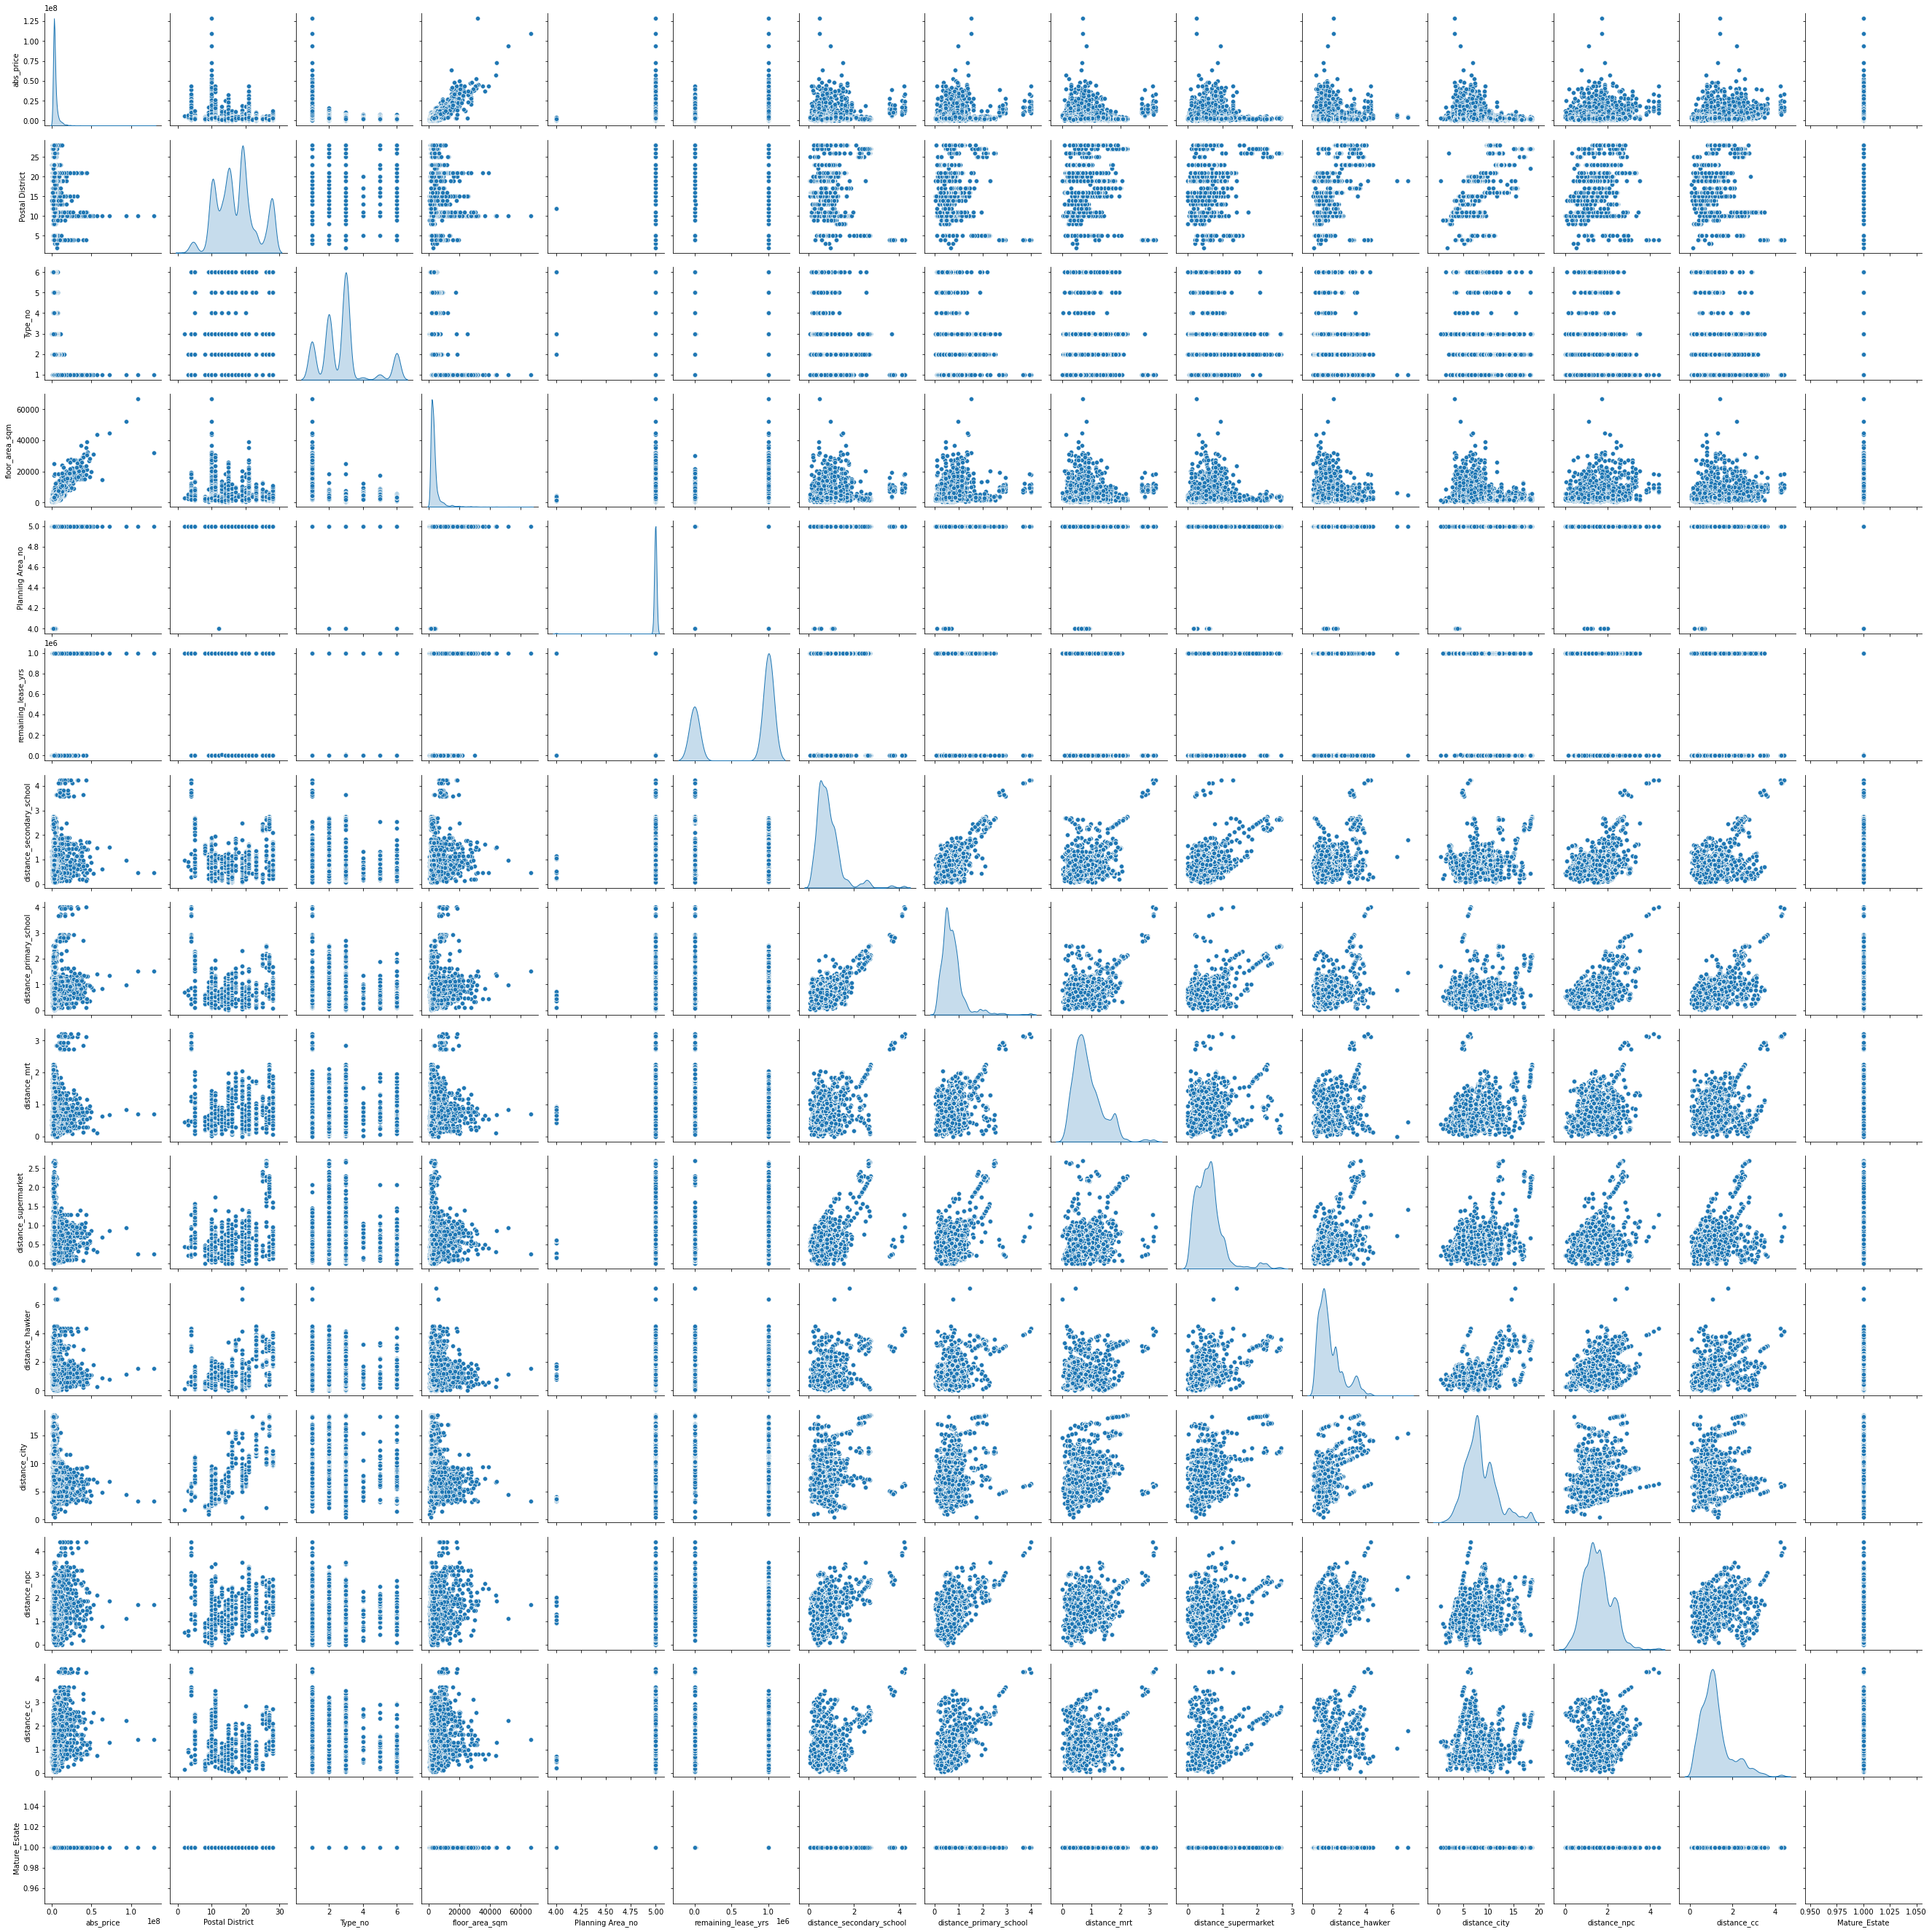

In [5]:
import seaborn as sns
sns.pairplot(dataset_features,diag_kind='kde')

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler


models_name=['LinearRegression','GBRT','RandomForest']
models=[]

models.append(LinearRegression())
models.append(ensemble.GradientBoostingRegressor(n_estimators=100))
models.append(ensemble.RandomForestRegressor(n_estimators=200))

In [11]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, resale_p, test_size=.3, random_state=0)
MSE_lst = []

for i in models:
    i.fit(X_train, y_train) # Train the model using the training sets
    y_pred = i.predict(X_test) # Make predictions using the testing set
    MSE = mean_squared_error(y_test, y_pred) # performance statistic
    MSE_lst.append(MSE)

np.random.seed(100)
regre = LinearRegression()
regre.fit(X_train, y_train) # Train the model using the training sets
y_pred_ols = regre.predict(X_test) # Make predictions using the testing set
MSE_ols = mean_squared_error(y_test, y_pred_ols) # performance statistic
MSE_lst.append(MSE_ols)
score_regre = regre.score(X_test,y_test)
print('OLS_MSE =', MSE_ols)
print('OLS_R squared =', score_regre)

from sklearn.ensemble import GradientBoostingRegressor
GradientBoostingRegressor = GradientBoostingRegressor()
GradientBoostingRegressor.fit(X=X_train, y=y_train)
y_pred_GradientBoostingRegressor = GradientBoostingRegressor.predict(X=X_test)
MSE_GradientBoostingRegressor = mean_squared_error(y_test, y_pred_GradientBoostingRegressor)
MSE_lst.append(MSE_GradientBoostingRegressor)
score_GBR = GradientBoostingRegressor.score(X_test,y_test)
print('GBR_MSE =', MSE_GradientBoostingRegressor)
print('GBR_R squared =', score_GBR)

from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor.fit(X=X_train, y=y_train)
y_pred_RandomForestRegressor = RandomForestRegressor.predict(X=X_test)
MSE_RandomForestRegressor = mean_squared_error(y_test, y_pred_RandomForestRegressor)
MSE_lst.append(MSE_RandomForestRegressor)
score_RFR = RandomForestRegressor.score(X_test,y_test)
print('RFR_MSE =',MSE_RandomForestRegressor)
print('RFR_R squared =', score_RFR)


OLS_MSE = 4688531784791.673
OLS_R squared = 0.8473243490863328
GBR_MSE = 3570250938931.6196
GBR_R squared = 0.8837396415238898
RFR_MSE = 5911945954969.158
RFR_R squared = 0.8074855331536492


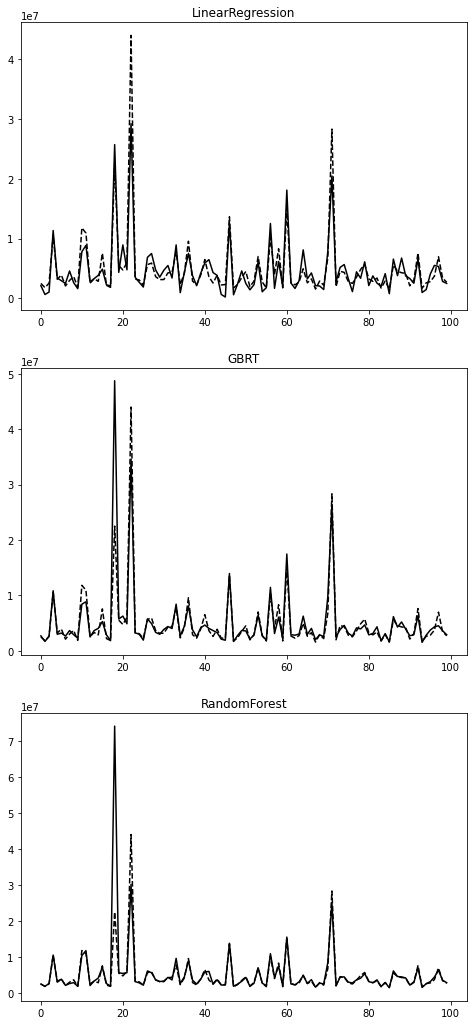

In [76]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,18))
for i in range(len(models)):
    plt.subplot(311+i)
    ax=plt.gca()
    y_pred=models[i].predict(X_test)
    ax.plot(range(len(y_test[:100])), y_test[:100],'k--',label='Actual')
    ax.plot(range(len(y_pred[:100])), y_pred[:100], 'k',label='Predicted')
    plt.title('%s'%models_name[i])

MSE Train: 293731609518.639, Test: 6225082157746.746
R2_Score Train: 0.991, Test: 0.797


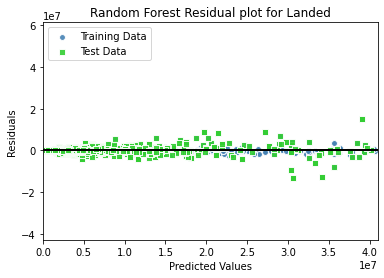

In [14]:
RandomForestRegressor.fit(X_train,y_train)
y_train_pred=RandomForestRegressor.predict(X_train)
y_test_pred=RandomForestRegressor.predict(X_test)

#Section 3: Evaluate model performance via MSE and R2_Score
from sklearn.metrics import mean_squared_error,r2_score

print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(y_train,y_train_pred),
                                       mean_squared_error(y_test,y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(y_train,y_train_pred),
                                            r2_score(y_test,y_test_pred)))
#Visualize the residuals of the prediction
plt.scatter(y_train_pred,y_train_pred-y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=30,
            alpha=0.9,
            label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Random Forest Residual plot for Landed")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=41000000,lw=2,color='black')
plt.xlim([0,41000000])
plt.show()

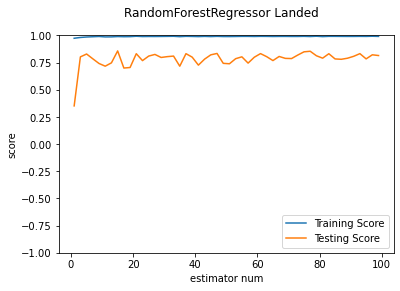

In [15]:
def test_RandomForestRegressor_num(*data):

    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,100,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        regr=ensemble.RandomForestRegressor(n_estimators=num)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1)
    plt.suptitle("RandomForestRegressor Landed")
    plt.show()
    
# test_RandomForestRegressor_num
test_RandomForestRegressor_num(X_train,X_test,y_train,y_test) 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train.astype('int'))
X_test_norm = mms.transform(X_test)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train.astype('int'))
X_test_std = stdsc.transform(X_test)

feat_labels = dataset_features.columns[1:]

forest = RandomForestClassifier(n_estimators=100,
                                random_state=1)

forest.fit(X_train, y_train.astype('int'))
importances = forest.feature_importances_
print(importances)

[0.02614677 0.02416202 0.4552524  0.0007066  0.02978284 0.05717202
 0.05753524 0.05813957 0.05875736 0.05842082 0.05798599 0.058104
 0.05783438 0.        ]


 1) floor_area_sqm                                               0.455252
 2) distance_supermarket                                         0.058757
 3) distance_hawker                                              0.058421
 4) distance_mrt                                                 0.058140
 5) distance_npc                                                 0.058104
 6) distance_city                                                0.057986
 7) distance_cc                                                  0.057834
 8) distance_primary_school                                      0.057535
 9) distance_secondary_school                                    0.057172
10) remaining_lease_yrs                                          0.029783
11) Postal District                                              0.026147
12) Type_no                                                      0.024162
13) Planning Area_no                                             0.000707
14) Mature_Estate                     

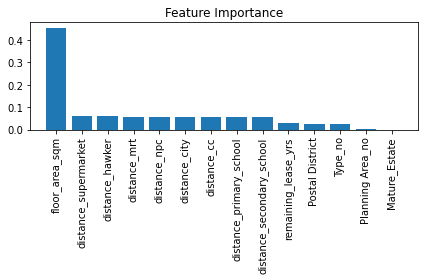

In [10]:
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 60,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [11]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)  
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:',
      X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

Number of features that meet this threshold criterion: 1
 1) floor_area_sqm                 0.455252


Text(0.5, 1.0, 'Max Features vs CV Error')

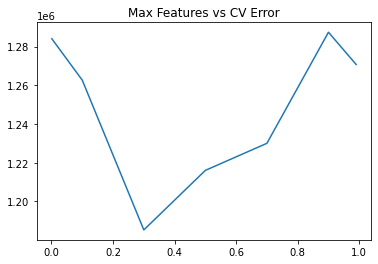

In [33]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

max_features = [.001,.1,.3,.5,.7,.9,.99]#trying a series of parameters
test_scores = []

for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators = 200,max_features = max_feat)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv = 5,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))


#result
import matplotlib.pyplot as plt
plt.plot(max_features,test_scores)
plt.title('Max Features vs CV Error')

In [34]:
#The optimal max features may be 0.3

In [12]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators = 200,max_features =0.3)
rfg.fit(X_train, y_train)
y_rfg = rfg.predict(X_test)
submission_df = pd.DataFrame(data= { 'y_test': y_test,'predicted_price': y_rfg})

In [104]:
print(rfg.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 0.3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [106]:
submission_df.head()

y_test  predicted_price
8076    2500000.0     2.526972e+06
11068   1800000.0     1.855083e+06
10386   2550000.0     2.623833e+06
2476   10580000.0     1.051162e+07
11425   3198000.0     2.995820e+06

In [13]:
from numpy import mean
average1 = mean(y_test)
average2 = mean(y_rfg)
max1 = np.max(y_test)
max2 = np.max(y_rfg)
print('Average y_test =', average1)
print('Average predicted_price =', average2)
print('Maximum y_test =', max1)
print('Maximum y_rfg =', max2)

Average y_test = 4831878.553330734
Average predicted_price = 4868299.330290501
Maximum y_test = 93900000.0
Maximum y_rfg = 74061005.80348484


In [37]:
submission_df.to_csv('rfg_landed.csv',index=False)